In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
iris=pd.read_csv("Iris_Data.csv")
iris=pd.DataFrame(iris)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
iris['abbrev']=iris.species.apply(lambda x: x.replace('Iris-',''))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,abbrev
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa


In [49]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
abbrev          150 non-null object
dtypes: float64(4), object(2)
memory usage: 7.1+ KB


In [50]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

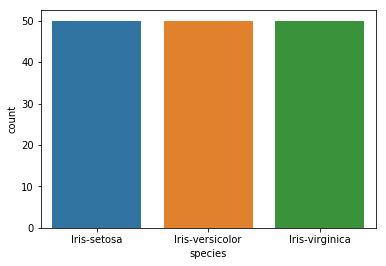

In [52]:
sns.countplot(x='species',data=iris)

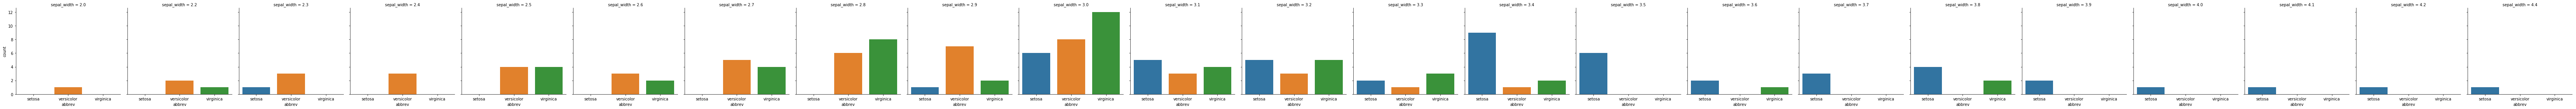

In [53]:
sns.factorplot(x='abbrev',col='sepal_width',kind='count',data=iris)

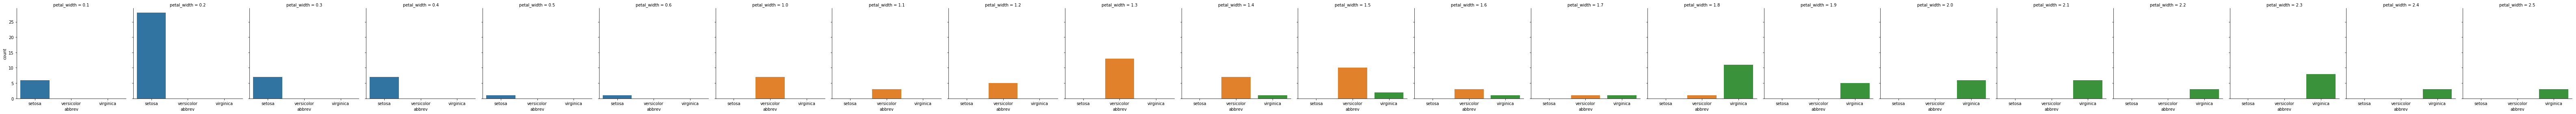

In [54]:
sns.factorplot(x='abbrev',col='petal_width',kind='count',data=iris)

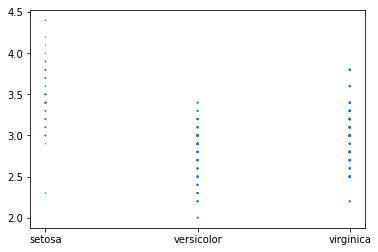

In [55]:
plt.scatter('abbrev','sepal_width','petal_width',data=iris)

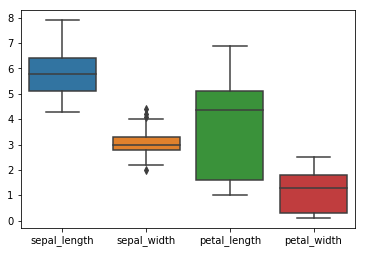

In [56]:
sns.boxplot(data=iris)

In [57]:
iris.quantile(1)

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
Name: 1, dtype: float64

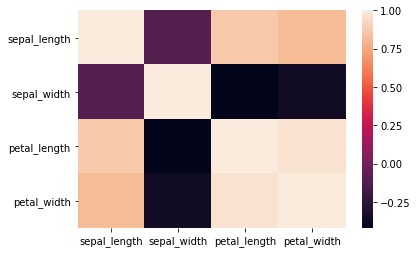

In [58]:
corr=iris.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

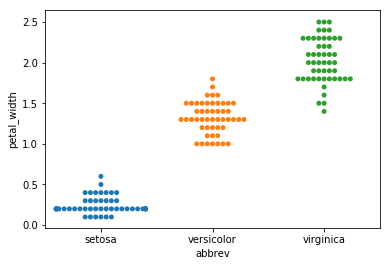

In [59]:
sns.swarmplot(x='abbrev',y='petal_width',data=iris)

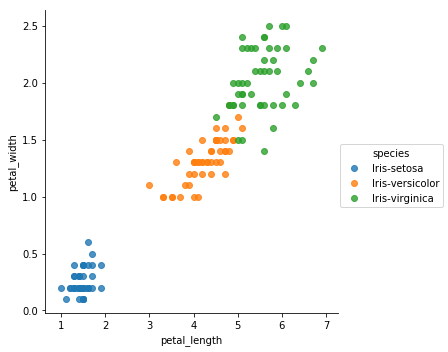

In [60]:
sns.lmplot(x='petal_length',y='petal_width',hue='species',fit_reg=False,data=iris)

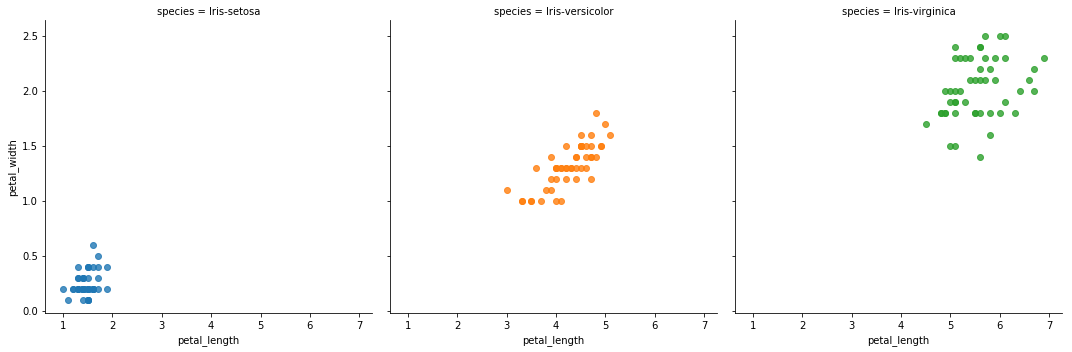

In [61]:
sns.lmplot(x='petal_length',y='petal_width',col='species',hue='species',fit_reg=False,data=iris)

In [62]:
iris.drop(columns=['abbrev'],inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
print(set(iris['species']))

{'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'}


In [64]:
for i in range(0,len(iris)):
    if(iris['species'][i]=='Iris-virginica'):
        iris['species'][i]=0
    elif(iris['species'][i]=='Iris-versicolor'):
        iris['species'][i]=1
    else:
        iris['species'][i]=2

C:\Users\AnandNoctis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\AnandNoctis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\AnandNoctis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package

In [65]:
print(set(iris['species']))

{0, 1, 2}


In [66]:
import sklearn
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
iris, iris.species, test_size=0.33)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(100, 5)
(50, 5)
(100,)
(50,)


In [93]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [94]:
lm.fit(X_train,Y_train)
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)

In [95]:
pred_train=pred_train.reshape((100,1))
print(pred_train.shape)
#Y_train.reshape([100,1])

(100, 1)


In [96]:
Y_train=np.array(Y_train)
Y_train=Y_train.reshape((100,1))
print(Y_train.shape)
#Y_train.reshape([100,1])

(100, 1)


In [97]:
pred_train=pred_train.astype('int64')

In [109]:
sumcheck=0
for i in range(0,len(pred_train)):
    error=Y_train[i][0]-pred_train[i][0]
    error=error*error
    sumcheck=sumcheck+error
print(sumcheck/len(pred_train)*100)

47.0
